In [17]:
from typing import List, Literal, Optional
import requests
import pandas as pd
from pydantic import BaseModel

In [22]:
class EloHistory(BaseModel):
    date: str  # '2021-Dec'
    numeric_date: int
    standard: int
    num_standard_games: int

In [23]:
class PlayerInfo(BaseModel):
    name: str
    federation: str
    birth_year: int
    sex: Literal["Male", "Female"]
    title: str
    standard_elo: int
    rapid_elo: int
    blitz_elo: int
    world_rank_all_players: int
    world_rank_active_players: int
    national_rank_all_players: int
    national_rank_active_players: int
    continental_rank_all_players: int
    continental_rank_active_players: int
    history: List[EloHistory] = None

In [24]:
BASE_URI = "https://fide-ratings-scraper.herokuapp.com"

def get_player_data(
    player_id: int = 13903748, 
    include_history: bool = True,
) -> None:
    _hist = "true" if include_history else "false"
    URI = f"{BASE_URI}/player/{player_id}/info?include_history={_hist}"
    try:
        response = requests.get(url=URI).json()
        player = PlayerInfo(**response)
    except Exception as err:
        print(err)
    return player


In [26]:
mihai = get_player_data(13903748)
mihai.history[0:5]

[EloHistory(date='2021-Dec', numeric_date=202112, standard=2230, num_standard_games=0),
 EloHistory(date='2021-Nov', numeric_date=202111, standard=2230, num_standard_games=0),
 EloHistory(date='2021-Oct', numeric_date=202110, standard=2230, num_standard_games=0),
 EloHistory(date='2021-Sep', numeric_date=202109, standard=2230, num_standard_games=0),
 EloHistory(date='2021-Aug', numeric_date=202108, standard=2230, num_standard_games=0)]

In [28]:
df_rating = pd.DataFrame([m.dict() for m in mihai.history])
df_rating.head()

,date,numeric_date,standard,num_standard_games
0,2021-Dec,202112,2230,0
1,2021-Nov,202111,2230,0
2,2021-Oct,202110,2230,0
3,2021-Sep,202109,2230,0
4,2021-Aug,202108,2230,0


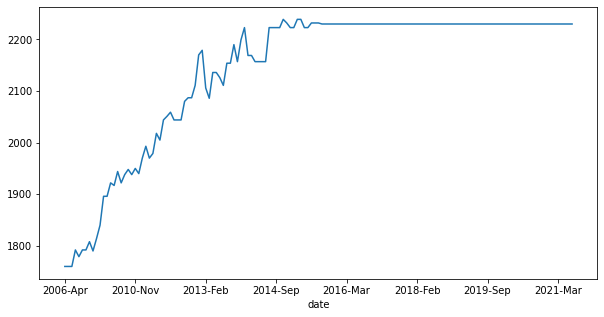

In [29]:
_ = (df_rating
    .set_index('date')["standard"]
    .sort_index(ascending=True)
    .plot(figsize=(10, 5))
)